# Preprocess the MIMIC-CXR dataset

Like with chexpert, our preprocessing is based on Glocker et al. https://github.com/biomedia-mira/chexploration/blob/main/notebooks/mimic.sample.ipynb

Please begin by following the steps in the notebook above. You should now have a directory called `preproc_224x224/` with the resized images. You will also have generated a file called `mimic.sample.csv`.

The rest of this notebook adapts these splits to be more consistent with our project.

Since the final splits are uploaded in this repo, there is no need to run this notebook again if your data is as described above. It is just included so you can reproduce the splits with changes if needed.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# where we saved mimic.sample.csv from Glocker et al.
TMP_SPLIT_DIR = "/mnt/mimic-cxr-jpg-224/meta/"   
SPLIT_DIR = "../splits/mimic/"  # where we will save our final split csv files

df = pd.read_csv(os.path.join(TMP_SPLIT_DIR, "mimic.sample.csv"))
df


,Unnamed: 0,dicom_id,subject_id,path,study_id,PerformedProcedureStepDescription,split,ViewPosition,Rows,Columns,...,sex,age,anchor_year,anchor_year_group,dod,race_label,sex_label,disease,disease_label,path_preproc
0,182694,cefb89df-d5d43f11-7266012a-248feb79-8f8f1244,19975044,p19/p19975044/s54760857/cefb89df-d5d43f11-7266...,54760857,Performed Desc,train,PA,2021,2021,...,Male,54.0,2152,2011 - 2013,NaN,0,0,Other,2,preproc_224x224/s54760857_cefb89df-d5d43f11-72...
1,69996,c4ca4bc3-56adf429-80528854-dd35290f-b36bf7a6,13855491,p13/p13855491/s54299881/c4ca4bc3-56adf429-8052...,54299881,CHEST (PORTABLE AP),train,AP,2539,3049,...,Female,64.0,2175,2011 - 2013,NaN,1,1,No Finding,0,preproc_224x224/s54299881_c4ca4bc3-56adf429-80...
2,117744,c5e0182b-436be488-dc7c03a1-73f4038b-97edf019,16394447,p16/p16394447/s50003676/c5e0182b-436be488-dc7c...,50003676,CHEST (PA AND LAT),test,PA,3056,2544,...,Female,44.0,2128,2008 - 2010,NaN,2,1,No Finding,0,preproc_224x224/s50003676_c5e0182b-436be488-dc...
3,165834,1f79433a-13c1630e-9e94f16e-9a0b7543-d8727427,19054639,p19/p19054639/s57071948/1f79433a-13c1630e-9e94...,57071948,CHEST (PA AND LAT),train,PA,3056,2544,...,Male,75.0,2136,2014 - 2016,NaN,0,0,No Finding,0,preproc_224x224/s57071948_1f79433a-13c1630e-9e...
4,56937,ee4a14cf-e7b0e508-abfe8215-b5709d1b-58cb5d0d,13126396,p13/p13126396/s52159951/ee4a14cf-e7b0e508-abfe...,52159951,CHEST (PORTABLE AP),train,AP,3050,2539,...,Female,68.0,2174,2008 - 2010,NaN,0,1,Other,2,preproc_224x224/s52159951_ee4a14cf-e7b0e508-ab...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183202,142180,a574c8d0-92f1ed0a-ed35cc44-36814299-5bacd4bc,17736979,p17/p17736979/s55712097/a574c8d0-92f1ed0a-ed35...,55712097,CHEST (PORTABLE AP),test,AP,3056,2544,...,Female,58.0,2150,2008 - 2010,NaN,0,1,No Finding,0,preproc_224x224/s55712097_a574c8d0-92f1ed0a-ed...
183203,87524,6e58d641-80bcf04b-3f158ee5-25c31e46-48ba6c0e,14800685,p14/p14800685/s55630994/6e58d641-80bcf04b-3f15...,55630994,CHEST (PORTABLE AP),test,AP,3056,2544,...,Female,21.0,2171,2014 - 2016,NaN,0,1,No Finding,0,preproc_224x224/s55630994_6e58d641-80bcf04b-3f...
183204,85348,f7029aa6-8d169f85-ddb9325a-fc1eb9fd-fcea1e7c,14690283,p14/p14690283/s53290505/f7029aa6-8d169f85-ddb9...,53290505,NaN,test,PA,2022,1796,...,Female,92.0,2131,2014 - 2016,2132-09-27,2,1,Pleural Effusion,1,preproc_224x224/s53290505_f7029aa6-8d169f85-dd...
183205,29817,bfd260e1-53010c82-d74fec00-2ded7b69-35d9a301,11648387,p11/p11648387/s57315445/bfd260e1-53010c82-d74f...,57315445,CHEST (PA AND LAT),train,PA,2540,3056,...,Male,70.0,2175,2008 - 2010,NaN,0,0,No Finding,0,preproc_224x224/s57315445_bfd260e1-53010c82-d7...


There already exist columns for race_label, sex_label etc... We create new ones called "Race", "Sex", "Age" with the binary labels we use in this project.

In [2]:
print(df['race'].unique())
print(df['sex'].unique())
print(df['age'].unique())

['White' 'Asian' 'Black']
['Male' 'Female']
[ 54.  64.  44.  75.  68.  39.  70.  56.  84.  74.  87.  61.  58.  85.
  60.  82.  67.  86.  79.  47.  52.  24.  71.  83.  89.  53.  42.  72.
  80.  59.  57.  32.  91.  66.  90.  77.  76.  88.  41.  46.  93.  65.
  73.  22.  81.  38.  45.  48.  51.  55.  63.  33.  78.  69.  29.  37.
  34.  94.  36.  20.  92.  28.  35.  62.  21.  40.  50.  31.  26.  27.
  25.  95.  43.  19.  30.  49.  98.  23.  96.  18.  97.  99. 100.  16.]


In [3]:
df['Race'] = df["race"]
# two race subgroups (white -> 0 vs. non-white -> 1)
df.loc[df['race'] == "White", 'Race'] = 0
df.loc[df['race'] != "White", 'Race'] = 1

df['Sex'] = df['sex']
# two sex subgroups (male -> 0 , female -> 1)
df.loc[df['sex'] == 'Male', 'Sex'] = 0
df.loc[df['sex'] == 'Female', 'Sex'] = 1

# two age subgroups (0-60 -> 0 , 60+ -> 1)
df['Age'] = df['age'].astype(int)

df.loc[df['age'] < 60, 'Age'] = 0
df.loc[df['age'] >= 60, 'Age'] = 1

df

,Unnamed: 0,dicom_id,subject_id,path,study_id,PerformedProcedureStepDescription,split,ViewPosition,Rows,Columns,...,anchor_year_group,dod,race_label,sex_label,disease,disease_label,path_preproc,Race,Sex,Age
0,182694,cefb89df-d5d43f11-7266012a-248feb79-8f8f1244,19975044,p19/p19975044/s54760857/cefb89df-d5d43f11-7266...,54760857,Performed Desc,train,PA,2021,2021,...,2011 - 2013,NaN,0,0,Other,2,preproc_224x224/s54760857_cefb89df-d5d43f11-72...,0,0,0
1,69996,c4ca4bc3-56adf429-80528854-dd35290f-b36bf7a6,13855491,p13/p13855491/s54299881/c4ca4bc3-56adf429-8052...,54299881,CHEST (PORTABLE AP),train,AP,2539,3049,...,2011 - 2013,NaN,1,1,No Finding,0,preproc_224x224/s54299881_c4ca4bc3-56adf429-80...,1,1,1
2,117744,c5e0182b-436be488-dc7c03a1-73f4038b-97edf019,16394447,p16/p16394447/s50003676/c5e0182b-436be488-dc7c...,50003676,CHEST (PA AND LAT),test,PA,3056,2544,...,2008 - 2010,NaN,2,1,No Finding,0,preproc_224x224/s50003676_c5e0182b-436be488-dc...,1,1,0
3,165834,1f79433a-13c1630e-9e94f16e-9a0b7543-d8727427,19054639,p19/p19054639/s57071948/1f79433a-13c1630e-9e94...,57071948,CHEST (PA AND LAT),train,PA,3056,2544,...,2014 - 2016,NaN,0,0,No Finding,0,preproc_224x224/s57071948_1f79433a-13c1630e-9e...,0,0,1
4,56937,ee4a14cf-e7b0e508-abfe8215-b5709d1b-58cb5d0d,13126396,p13/p13126396/s52159951/ee4a14cf-e7b0e508-abfe...,52159951,CHEST (PORTABLE AP),train,AP,3050,2539,...,2008 - 2010,NaN,0,1,Other,2,preproc_224x224/s52159951_ee4a14cf-e7b0e508-ab...,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183202,142180,a574c8d0-92f1ed0a-ed35cc44-36814299-5bacd4bc,17736979,p17/p17736979/s55712097/a574c8d0-92f1ed0a-ed35...,55712097,CHEST (PORTABLE AP),test,AP,3056,2544,...,2008 - 2010,NaN,0,1,No Finding,0,preproc_224x224/s55712097_a574c8d0-92f1ed0a-ed...,0,1,0
183203,87524,6e58d641-80bcf04b-3f158ee5-25c31e46-48ba6c0e,14800685,p14/p14800685/s55630994/6e58d641-80bcf04b-3f15...,55630994,CHEST (PORTABLE AP),test,AP,3056,2544,...,2014 - 2016,NaN,0,1,No Finding,0,preproc_224x224/s55630994_6e58d641-80bcf04b-3f...,0,1,0
183204,85348,f7029aa6-8d169f85-ddb9325a-fc1eb9fd-fcea1e7c,14690283,p14/p14690283/s53290505/f7029aa6-8d169f85-ddb9...,53290505,NaN,test,PA,2022,1796,...,2014 - 2016,2132-09-27,2,1,Pleural Effusion,1,preproc_224x224/s53290505_f7029aa6-8d169f85-dd...,1,1,1
183205,29817,bfd260e1-53010c82-d74fec00-2ded7b69-35d9a301,11648387,p11/p11648387/s57315445/bfd260e1-53010c82-d74f...,57315445,CHEST (PA AND LAT),train,PA,2540,3056,...,2008 - 2010,NaN,0,0,No Finding,0,preproc_224x224/s57315445_bfd260e1-53010c82-d7...,0,0,1


We also create a 'binaryLabel' column where no finding is 1 and any finding is 0. This is the label we use for the binary classification task.

I know it's a bit unintuitive but it keeps our binary classification task consistent with MEDFAIR.

In [4]:
labels = [
    'No Finding',
    'Enlarged Cardiomediastinum',
    'Cardiomegaly',
    'Lung Opacity',
    'Lung Lesion',
    'Edema',
    'Consolidation',
    'Pneumonia',
    'Atelectasis',
    'Pneumothorax',
    'Pleural Effusion',
    'Pleural Other',
    'Fracture',
    'Support Devices']

In [5]:
# convert to binary labels: no finding -> 0, other -> 1
# its a bit weird but we do it to stay consistent with MEDFAIR
df['disease'] = df[labels[0]]
df.loc[df[labels[0]] == 1, 'disease'] = labels[0]
df.loc[df['disease'].isna(), 'disease'] = 'Other'

df['binaryLabel'] = df['disease']
df.loc[df['disease'] == labels[0], 'binaryLabel'] = 0
df.loc[df['disease'] == 'Other', 'binaryLabel'] = 1

df

,Unnamed: 0,dicom_id,subject_id,path,study_id,PerformedProcedureStepDescription,split,ViewPosition,Rows,Columns,...,dod,race_label,sex_label,disease,disease_label,path_preproc,Race,Sex,Age,binaryLabel
0,182694,cefb89df-d5d43f11-7266012a-248feb79-8f8f1244,19975044,p19/p19975044/s54760857/cefb89df-d5d43f11-7266...,54760857,Performed Desc,train,PA,2021,2021,...,NaN,0,0,Other,2,preproc_224x224/s54760857_cefb89df-d5d43f11-72...,0,0,0,1
1,69996,c4ca4bc3-56adf429-80528854-dd35290f-b36bf7a6,13855491,p13/p13855491/s54299881/c4ca4bc3-56adf429-8052...,54299881,CHEST (PORTABLE AP),train,AP,2539,3049,...,NaN,1,1,No Finding,0,preproc_224x224/s54299881_c4ca4bc3-56adf429-80...,1,1,1,0
2,117744,c5e0182b-436be488-dc7c03a1-73f4038b-97edf019,16394447,p16/p16394447/s50003676/c5e0182b-436be488-dc7c...,50003676,CHEST (PA AND LAT),test,PA,3056,2544,...,NaN,2,1,No Finding,0,preproc_224x224/s50003676_c5e0182b-436be488-dc...,1,1,0,0
3,165834,1f79433a-13c1630e-9e94f16e-9a0b7543-d8727427,19054639,p19/p19054639/s57071948/1f79433a-13c1630e-9e94...,57071948,CHEST (PA AND LAT),train,PA,3056,2544,...,NaN,0,0,No Finding,0,preproc_224x224/s57071948_1f79433a-13c1630e-9e...,0,0,1,0
4,56937,ee4a14cf-e7b0e508-abfe8215-b5709d1b-58cb5d0d,13126396,p13/p13126396/s52159951/ee4a14cf-e7b0e508-abfe...,52159951,CHEST (PORTABLE AP),train,AP,3050,2539,...,NaN,0,1,Other,2,preproc_224x224/s52159951_ee4a14cf-e7b0e508-ab...,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183202,142180,a574c8d0-92f1ed0a-ed35cc44-36814299-5bacd4bc,17736979,p17/p17736979/s55712097/a574c8d0-92f1ed0a-ed35...,55712097,CHEST (PORTABLE AP),test,AP,3056,2544,...,NaN,0,1,No Finding,0,preproc_224x224/s55712097_a574c8d0-92f1ed0a-ed...,0,1,0,0
183203,87524,6e58d641-80bcf04b-3f158ee5-25c31e46-48ba6c0e,14800685,p14/p14800685/s55630994/6e58d641-80bcf04b-3f15...,55630994,CHEST (PORTABLE AP),test,AP,3056,2544,...,NaN,0,1,No Finding,0,preproc_224x224/s55630994_6e58d641-80bcf04b-3f...,0,1,0,0
183204,85348,f7029aa6-8d169f85-ddb9325a-fc1eb9fd-fcea1e7c,14690283,p14/p14690283/s53290505/f7029aa6-8d169f85-ddb9...,53290505,NaN,test,PA,2022,1796,...,2132-09-27,2,1,Other,1,preproc_224x224/s53290505_f7029aa6-8d169f85-dd...,1,1,1,1
183205,29817,bfd260e1-53010c82-d74fec00-2ded7b69-35d9a301,11648387,p11/p11648387/s57315445/bfd260e1-53010c82-d74f...,57315445,CHEST (PA AND LAT),train,PA,2540,3056,...,NaN,0,0,No Finding,0,preproc_224x224/s57315445_bfd260e1-53010c82-d7...,0,0,1,0


In [6]:
# replace Path column with path_preproc
# this is to point us to the preprocessed images

df['Path'] = df['path_preproc']
df

,Unnamed: 0,dicom_id,subject_id,path,study_id,PerformedProcedureStepDescription,split,ViewPosition,Rows,Columns,...,race_label,sex_label,disease,disease_label,path_preproc,Race,Sex,Age,binaryLabel,Path
0,182694,cefb89df-d5d43f11-7266012a-248feb79-8f8f1244,19975044,p19/p19975044/s54760857/cefb89df-d5d43f11-7266...,54760857,Performed Desc,train,PA,2021,2021,...,0,0,Other,2,preproc_224x224/s54760857_cefb89df-d5d43f11-72...,0,0,0,1,preproc_224x224/s54760857_cefb89df-d5d43f11-72...
1,69996,c4ca4bc3-56adf429-80528854-dd35290f-b36bf7a6,13855491,p13/p13855491/s54299881/c4ca4bc3-56adf429-8052...,54299881,CHEST (PORTABLE AP),train,AP,2539,3049,...,1,1,No Finding,0,preproc_224x224/s54299881_c4ca4bc3-56adf429-80...,1,1,1,0,preproc_224x224/s54299881_c4ca4bc3-56adf429-80...
2,117744,c5e0182b-436be488-dc7c03a1-73f4038b-97edf019,16394447,p16/p16394447/s50003676/c5e0182b-436be488-dc7c...,50003676,CHEST (PA AND LAT),test,PA,3056,2544,...,2,1,No Finding,0,preproc_224x224/s50003676_c5e0182b-436be488-dc...,1,1,0,0,preproc_224x224/s50003676_c5e0182b-436be488-dc...
3,165834,1f79433a-13c1630e-9e94f16e-9a0b7543-d8727427,19054639,p19/p19054639/s57071948/1f79433a-13c1630e-9e94...,57071948,CHEST (PA AND LAT),train,PA,3056,2544,...,0,0,No Finding,0,preproc_224x224/s57071948_1f79433a-13c1630e-9e...,0,0,1,0,preproc_224x224/s57071948_1f79433a-13c1630e-9e...
4,56937,ee4a14cf-e7b0e508-abfe8215-b5709d1b-58cb5d0d,13126396,p13/p13126396/s52159951/ee4a14cf-e7b0e508-abfe...,52159951,CHEST (PORTABLE AP),train,AP,3050,2539,...,0,1,Other,2,preproc_224x224/s52159951_ee4a14cf-e7b0e508-ab...,0,1,1,1,preproc_224x224/s52159951_ee4a14cf-e7b0e508-ab...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183202,142180,a574c8d0-92f1ed0a-ed35cc44-36814299-5bacd4bc,17736979,p17/p17736979/s55712097/a574c8d0-92f1ed0a-ed35...,55712097,CHEST (PORTABLE AP),test,AP,3056,2544,...,0,1,No Finding,0,preproc_224x224/s55712097_a574c8d0-92f1ed0a-ed...,0,1,0,0,preproc_224x224/s55712097_a574c8d0-92f1ed0a-ed...
183203,87524,6e58d641-80bcf04b-3f158ee5-25c31e46-48ba6c0e,14800685,p14/p14800685/s55630994/6e58d641-80bcf04b-3f15...,55630994,CHEST (PORTABLE AP),test,AP,3056,2544,...,0,1,No Finding,0,preproc_224x224/s55630994_6e58d641-80bcf04b-3f...,0,1,0,0,preproc_224x224/s55630994_6e58d641-80bcf04b-3f...
183204,85348,f7029aa6-8d169f85-ddb9325a-fc1eb9fd-fcea1e7c,14690283,p14/p14690283/s53290505/f7029aa6-8d169f85-ddb9...,53290505,NaN,test,PA,2022,1796,...,2,1,Other,1,preproc_224x224/s53290505_f7029aa6-8d169f85-dd...,1,1,1,1,preproc_224x224/s53290505_f7029aa6-8d169f85-dd...
183205,29817,bfd260e1-53010c82-d74fec00-2ded7b69-35d9a301,11648387,p11/p11648387/s57315445/bfd260e1-53010c82-d74f...,57315445,CHEST (PA AND LAT),train,PA,2540,3056,...,0,0,No Finding,0,preproc_224x224/s57315445_bfd260e1-53010c82-d7...,0,0,1,0,preproc_224x224/s57315445_bfd260e1-53010c82-d7...


In [7]:
# split and save
df_train = df[df.split=="train"]
df_val = df[df.split=="validate"]
df_test = df[df.split=="test"]

df_train.to_csv(os.path.join(SPLIT_DIR, "train.csv"))
df_val.to_csv(os.path.join(SPLIT_DIR, "val.csv"))
df_test.to_csv(os.path.join(SPLIT_DIR, "test.csv"))

## Splits are done, now visualise the data and get some summary statistics

sanity check
Image shape: (224, 224), Image type: uint8, Image range: 0 - 255, Age: 0, Sex: 0, Race: 0, Disease: 1


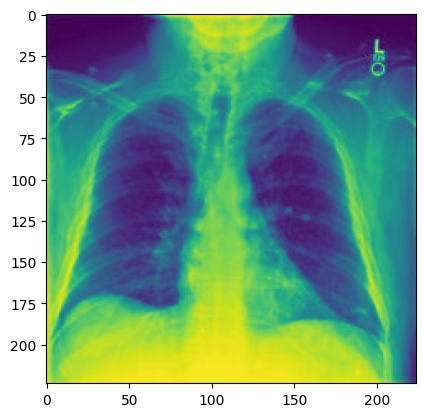

In [8]:
DATA_DIR = "/mnt/mimic-cxr-jpg-224/data/"

print("sanity check")
img = plt.imread(os.path.join(DATA_DIR, df["Path"].values[0]))  # type: ignore
print(
    f"Image shape: {img.shape}, Image type: {img.dtype}, Image range: {img.min()} -"
    f" {img.max()}, Age: {df['Age'].values[0]}, Sex:"
    f" {df['Age'].values[0]}, Race: {df['Race'].values[0]}"
    f", Disease: {df['binaryLabel'].values[0]}"
)
plt.imshow(img)

In [9]:
num_images = df.shape[0]
print(f"Number of images: {num_images}")

num_patients = len(df["subject_id"].unique())
print(f"Number of patients: {num_patients}")

num_male = len(df[df["Sex"] == 0])
print(f"Number of Males: {num_male}")

num_female = len(df[df["Sex"] == 1])
print(f"Number of Females: {num_female}")

assert num_male + num_female == num_images

num_under_60 = len(df[df["Age"] == 0])
print(f"Number of Under 60: {num_under_60}")

num_over_60 = len(df[df["Age"] == 1])
print(f"Number of Over 60: {num_over_60}")

assert num_under_60 + num_over_60 == num_images

num_white = len(df[df["Race"] == 0])
print(f"Number of White: {num_white}")

num_non_white = len(df[df["Race"] == 1])
print(f"Number of Non-White: {num_non_white}")

num_benign = len(df[df["binaryLabel"] == 0])
print(f"Number of findings: {num_benign}")

num_malignant = len(df[df["binaryLabel"] == 1])
print(f"Number of no-findings: {num_malignant}")

assert num_benign + num_malignant == num_images

Number of images: 183207
Number of patients: 43209
Number of Males: 98014
Number of Females: 85193
Number of Under 60: 63451
Number of Over 60: 119756
Number of White: 141865
Number of Non-White: 41342
Number of findings: 56615
Number of no-findings: 126592


In [10]:

print(f"percentage of male images: {num_male / num_images * 100}")
print(f"percentage of female images: {num_female / num_images * 100}")

num_male_positive_label = len(df[df["Sex"] == 0][df["binaryLabel"] == 1])
num_male_negative_label = len(df[df["Sex"] == 0][df["binaryLabel"] == 0])
assert num_male_positive_label + num_male_negative_label == num_male

print(f"prevalence of positive class in male: {num_male_positive_label / num_male * 100}")

num_female_positive_label = len(df[df["Sex"] == 1][df["binaryLabel"] == 1])
print(f"prevalence of positive class in female: {num_female_positive_label / num_female * 100}")

print(f"percentage of under 60 images: {num_under_60 / num_images * 100}")

num_under_60_positive_label = len(df[df["Age"] == 0][df["binaryLabel"] == 1])
print(f"prevalence of positive class in under 60: {num_under_60_positive_label / num_under_60 * 100}")

print(f"percentage of over 60 images: {num_over_60 / num_images * 100}")

num_over_60_positive_label = len(df[df["Age"] == 1][df["binaryLabel"] == 1])
print(f"prevalence of positive class in over 60: {num_over_60_positive_label / num_over_60 * 100}")

print(f"percentage of white images: {num_white / num_images * 100}")

num_white_positive_label = len(df[df["Race"] == 0][df["binaryLabel"] == 1])
print(f"prevalence of positive class in white: {num_white_positive_label / num_white * 100}")

print(f"percentage of non-white images: {num_non_white / num_images * 100}")

num_non_white_positive_label = len(df[df["Race"] == 1][df["binaryLabel"] == 1])

print(f"prevalence of positive class in non-white: {num_non_white_positive_label / num_non_white * 100}")

percentage of male images: 53.49904752547665
percentage of female images: 46.50095247452335
prevalence of positive class in male: 70.82253555614504
prevalence of positive class in female: 67.11349524021927
percentage of under 60 images: 34.63350199501111


/tmp/ipykernel_837436/1343162443.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_male_positive_label = len(df[df["Sex"] == 0][df["binaryLabel"] == 1])
/tmp/ipykernel_837436/1343162443.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_male_negative_label = len(df[df["Sex"] == 0][df["binaryLabel"] == 0])
/tmp/ipykernel_837436/1343162443.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_female_positive_label = len(df[df["Sex"] == 1][df["binaryLabel"] == 1])
/tmp/ipykernel_837436/1343162443.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_under_60_positive_label = len(df[df["Age"] == 0][df["binaryLabel"] == 1])


prevalence of positive class in under 60: 58.12674347134009
percentage of over 60 images: 65.3664980049889
prevalence of positive class in over 60: 74.91065165837202
percentage of white images: 77.43426834127517
prevalence of positive class in white: 70.94773199873119
percentage of non-white images: 22.56573165872483
prevalence of positive class in non-white: 62.7497460209956


/tmp/ipykernel_837436/1343162443.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_over_60_positive_label = len(df[df["Age"] == 1][df["binaryLabel"] == 1])
/tmp/ipykernel_837436/1343162443.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_white_positive_label = len(df[df["Race"] == 0][df["binaryLabel"] == 1])
/tmp/ipykernel_837436/1343162443.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_non_white_positive_label = len(df[df["Race"] == 1][df["binaryLabel"] == 1])
